

#*Trabajo Final  detección de fraudes *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Conjuntos de datos financieros sintéticos para la detección de fraudes***

PaySim simula transacciones de dinero móvil basándose en una muestra de transacciones reales extraídas de un mes de registros financieros de un servicio de dinero móvil implementado en un país africano. Los registros originales fueron proporcionados por una empresa multinacional, proveedora del servicio financiero móvil, que actualmente opera en más de 14 países de todo el mundo.

Este conjunto de datos sintéticos se reduce a 1/4 del conjunto de datos original y se creó exclusivamente para Kaggle.

**NOTA:** Las transacciones que se detectan como fraude se cancelan, por lo que para la detección de fraudes estas columnas (oldbalanceOrg, newbalanceOrig, oldbalanceDest ) no debe utilizarse.

**Dataset:** https://www.kaggle.com/datasets/ealaxi/paysim1/data



## ***Importación de librerias***

In [ ]:
# Importamos las librerias necesarias para la EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn

## ***Importación de la Base de Datos***

In [ ]:
# Importacion a la base de datos local
df = pd.read_csv('/content/dataSetFraudes.csv')

In [ ]:
   # Importacion a la base de datos usando drive
    # from google.colab import drive
     #drive.mount('/content/drive')
  #   df = pd.read_csv('/content/drive/MyDrive/dataSetFraudes.csv')

## ***Analisis de Dataset***

In [ ]:
# Analizo los datos de los primeros 10 registros
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [ ]:
# informacion de dataframe columas y tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42271 entries, 0 to 42270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42271 non-null  int64  
 1   type            42271 non-null  object 
 2   amount          42271 non-null  float64
 3   nameOrig        42271 non-null  object 
 4   oldbalanceOrg   42271 non-null  float64
 5   newbalanceOrig  42271 non-null  float64
 6   nameDest        42271 non-null  object 
 7   oldbalanceDest  42270 non-null  float64
 8   newbalanceDest  42270 non-null  float64
 9   isFraud         42270 non-null  float64
 10  isFlaggedFraud  42270 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.5+ MB


In [ ]:
#Verifico el tipo de varibles que tengo
va=df.dtypes
print(va)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object


In [ ]:
# Analizo la cantidad de filas y columnas

print('filas:',df.shape[0])
print('columnas:',df.shape[1])

filas: 42271
columnas: 11


### Tengo:
- Filas: 6362620
- Columnas: 11


In [ ]:
# Nombre de las columnas
print('Nombre de las columnas')
df.columns

Nombre de las columnas


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## **Explicación de cabeceras**

Esta es una muestra de 1 fila con explicación de cabeceras:

1,PAYMENT,1060.31,C429214117,1089.089,28.69,M1591654462,0.0,0,0

**step:** *mapea una unidad de tiempo en el mundo real. En este caso 1 step es 1 hora de tiempo. Pasos totales 744 (31 días de simulación).*

**type:** CASH-IN, CASH-OUT, DEBIT, PAYMENT y TRANSFER.

**amount:** *cantidad de la transacción en moneda local.*

**nameOrig:** *cliente que inició la transacción*

**oldbalanceOrg**: *saldo inicial antes de la transacción*

**newbalanceOrig:** *nuevo saldo después de la transacción.*

**nameDest:** *cliente que es el destinatario de la transacción*

**oldbalanceDest:** *receptor inicial de saldo antes de la transacción. Tenga en cuenta que no hay información para los clientes que comiencen con M (Merchants).*

**newbalanceDest:** *nuevo receptor de saldo después de la transacción. Tenga en cuenta que no hay información para los clientes que comiencen con M (Merchants).*

**isFraud:** *Estas son las transacciones realizadas por los agentes fraudulentos dentro de la simulación. En este conjunto de datos específico el comportamiento fraudulento de los agentes pretende beneficiarse tomando el control o las cuentas de los clientes y tratar de vaciar los fondos transfiriendo a otra cuenta y luego sacar el dinero del sistema.*

**isFlaggedFraud:** *El modelo de negocio tiene como objetivo controlar las transferencias masivas de una cuenta a otra y marca intentos ilegales. Un intento ilegal en este conjunto de datos es un intento de transferir más de 200.000 en una sola transacción.*


# ⚠️ IMPORTANTE ⚠️
**Como en las transacciones fraudulentas se cancelan los movimientos, ningún valor de balance es confiable para predecir el fraude, ya que fue alterado por el simulador despues de la detección del fraude.**

In [ ]:
# Vamos a eliminar todas las columnas de balance

df_mod = df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1)
df_mod

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,M1979787155,0,0
1,1,PAYMENT,1864.28,C1666544295,M2044282225,0,0
2,1,TRANSFER,181.00,C1305486145,C553264065,1,0
3,1,CASH_OUT,181.00,C840083671,C38997010,1,0
4,1,PAYMENT,11668.14,C2048537720,M1230701703,0,0
...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,C776919290,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,C1881841831,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,C1365125890,1,0
6362618,743,TRANSFER,850002.52,C1685995037,C2080388513,1,0


In [ ]:
# Analizo la variable Fraude
df['isFraud'].value_counts(normalize=True)


,proportion
isFraud,
0,0.998709
1,0.001291


### Detectamos que hay un desbalance considerable entre lo que esta etiquetado como
- 1 = Fraude
- 0 = No Fraude

In [ ]:
# Verificamos los tipos de transacción
print("Tipos de transacción:")

df_mod['type'].value_counts()

Tipos de transacción:


,count
type,
PAYMENT,19382
CASH_OUT,10689
CASH_IN,7632
TRANSFER,3974
DEBIT,594


In [ ]:
# Filtramos fraude por tipo de transacción
fraude_por_tipo = df_mod.groupby('type')['isFraud'].mean().sort_values(ascending=False)
print(fraude_por_tipo)



type
TRANSFER    0.011575
CASH_OUT    0.004491
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


### Vemos que los fraudes estan concentrados en 2 tipos de transacciones
- TRANSFER =   0.007688
- CASH_OUT =   0.001840

### Vamos a confirmar ésto graficamente


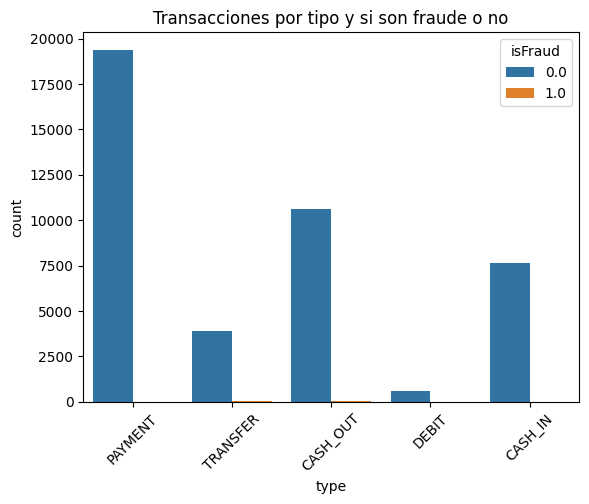

In [ ]:
# Grafica por tipo y fraude
sns.countplot(data=df_mod, x='type', hue='isFraud')
plt.title("Transacciones por tipo y si son fraude o no")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Analizo la diferencia de los montos que hay "con fraude" y "sin fraude"
df_mod.groupby('isFraud')['amount'].mean().round(2)

,amount
isFraud,
0.0,148133.40
1.0,541377.07


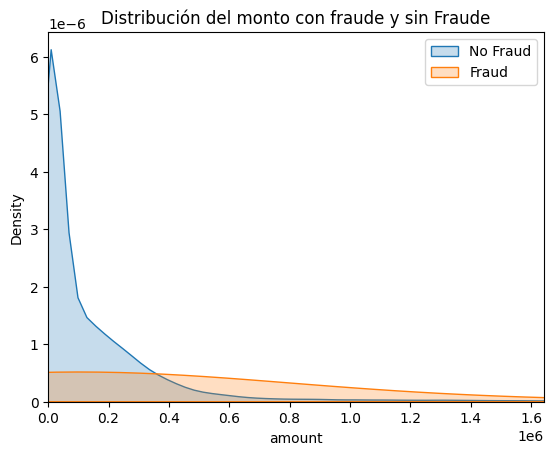

In [ ]:
#Grafico de Disribucion de montos con fraude y sin Fraude

sns.kdeplot(data=df_mod[df_mod['isFraud'] == 0], x='amount', label='No Fraud', fill=True)
sns.kdeplot(data=df_mod[df_mod['isFraud'] == 1], x='amount', label='Fraud', fill=True)
plt.xlim(0, df_mod['amount'].quantile(0.99))  # evitamos top 1% para verlo más expandido al grafico
plt.title("Distribución del monto con fraude y sin Fraude")
plt.legend()
plt.show()

### En relación al tiempo voy a analizar por dia como:
- 1 step= 1 dia
### voy a agregar una columna dia a un nuevo dataframe para ver en lapso de dias cuando hay más fraude

In [ ]:
# CReo copia
df_mod_col = df_mod.copy()

# Crear columna 'dia' condicionalmente para graficar
df_mod_col['dia'] = df_mod_col.apply(lambda row: round(row['step'] / 24, 0) if row['isFraud'] == 1 else 0, axis=1).astype(int)

df_mod_col.tail()

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,dia
6362615,743,CASH_OUT,339682.13,C786484425,C776919290,1,0,31
6362616,743,TRANSFER,6311409.28,C1529008245,C1881841831,1,0,31
6362617,743,CASH_OUT,6311409.28,C1162922333,C1365125890,1,0,31
6362618,743,TRANSFER,850002.52,C1685995037,C2080388513,1,0,31
6362619,743,CASH_OUT,850002.52,C1280323807,C873221189,1,0,31


<Axes: xlabel='isFraud', ylabel='dia'>

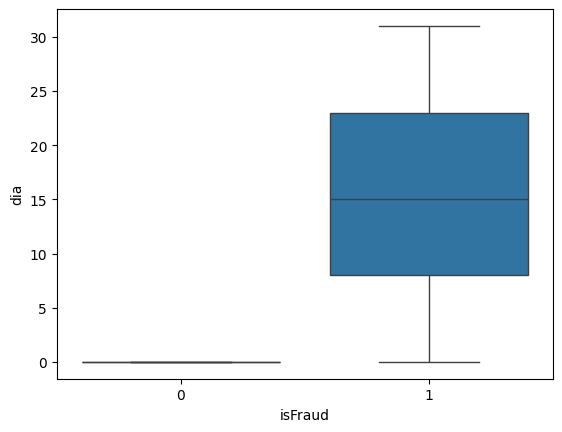

In [ ]:

sns.boxplot(x= df_mod_col['isFraud'],y=df_mod_col['dia'])

### Aproximadamente del dia 7 al 23 es donde se concentran los fraudes

In [ ]:
df_prueba = df_mod_col.copy()
bins = [0, 5, 10, 15, 20, 25, 31]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-31']

# Paso 2: Crear columna 'rango_dia' con pd.cut()
df_prueba['rango_dia'] = pd.cut(df_prueba['dia'], bins=bins, labels=labels, right=True)



fraudes_por_rango = (
    df_prueba[df_prueba['isFraud'] == 1]
    .groupby('rango_dia')['amount']
    .sum()
    .reset_index(name='monto_fraude')
)

fraudes_por_rango


<ipython-input-110-14c0d6f46d63>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('rango_dia')['amount']


,rango_dia,monto_fraude
0,1-5,1.775091e+09
1,6-10,1.931750e+09
2,11-15,1.892609e+09
3,16-20,2.198885e+09
4,21-25,1.643760e+09
5,26-31,2.528988e+09


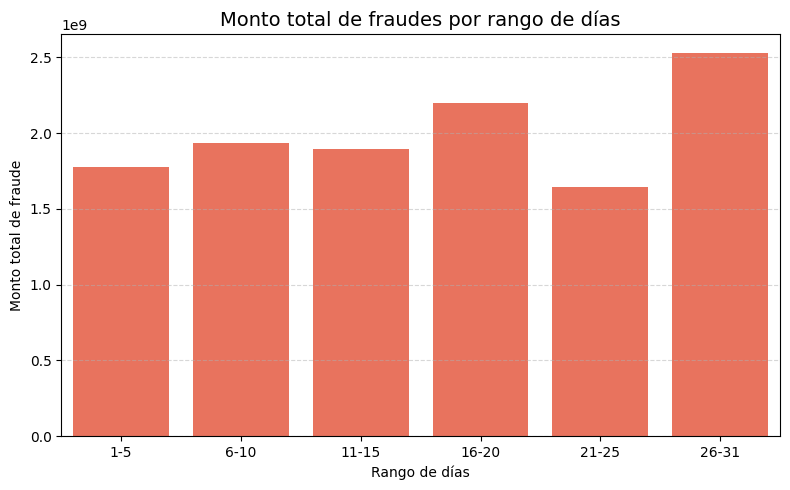

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=fraudes_por_rango, x='rango_dia', y='monto_fraude', color='tomato')

plt.title('Monto total de fraudes por rango de días', fontsize=14)
plt.xlabel('Rango de días')
plt.ylabel('Monto total de fraude')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

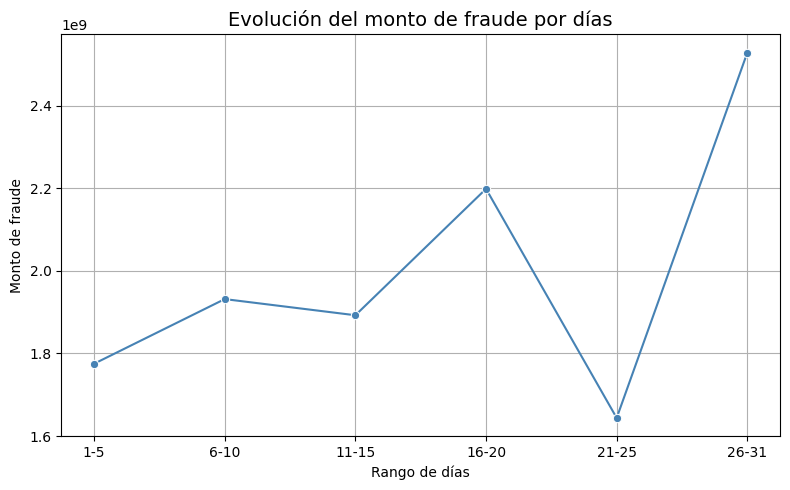

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=fraudes_por_rango, x='rango_dia', y='monto_fraude', marker='o', color='steelblue')

plt.title('Evolución del monto de fraude por días', fontsize=14)
plt.xlabel('Rango de días')
plt.ylabel('Monto de fraude')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
cont_fraudes = (
    df_prueba[df_prueba['isFraud'] == 1]
    .groupby('rango_dia', observed=True)
    .size()
    .reset_index(name='cantidad_fraudes')
)

# Combinamos con el monto
fraudes_df = pd.merge(fraudes_por_rango, cont_fraudes, on='rango_dia')

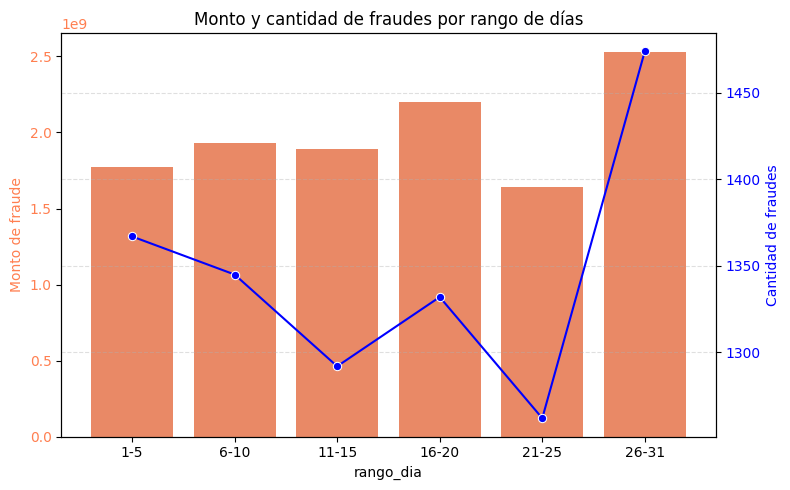

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 5))

sns.barplot(data=fraudes_df, x='rango_dia', y='monto_fraude', color='coral', ax=ax1)
ax1.set_ylabel('Monto de fraude', color='coral')
ax1.tick_params(axis='y', labelcolor='coral')

# Eje secundario para cantidad
ax2 = ax1.twinx()
sns.lineplot(data=fraudes_df, x='rango_dia', y='cantidad_fraudes', marker='o', color='blue', ax=ax2)
ax2.set_ylabel('Cantidad de fraudes', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Monto y cantidad de fraudes por rango de días')
plt.xlabel('Rango de días')
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Para que me quede mas claro voy a ver por dia la cantidad de fraudes y los montos

In [ ]:
df_only_fraude = df_mod_col[df_mod_col['isFraud'] == 1]

# Agrupar por día
fraude_agrupado = (
    df_only_fraude.groupby('dia')
    .agg(monto_total=('amount', 'sum'), cantidad=('amount', 'count'))
    .reset_index()
)

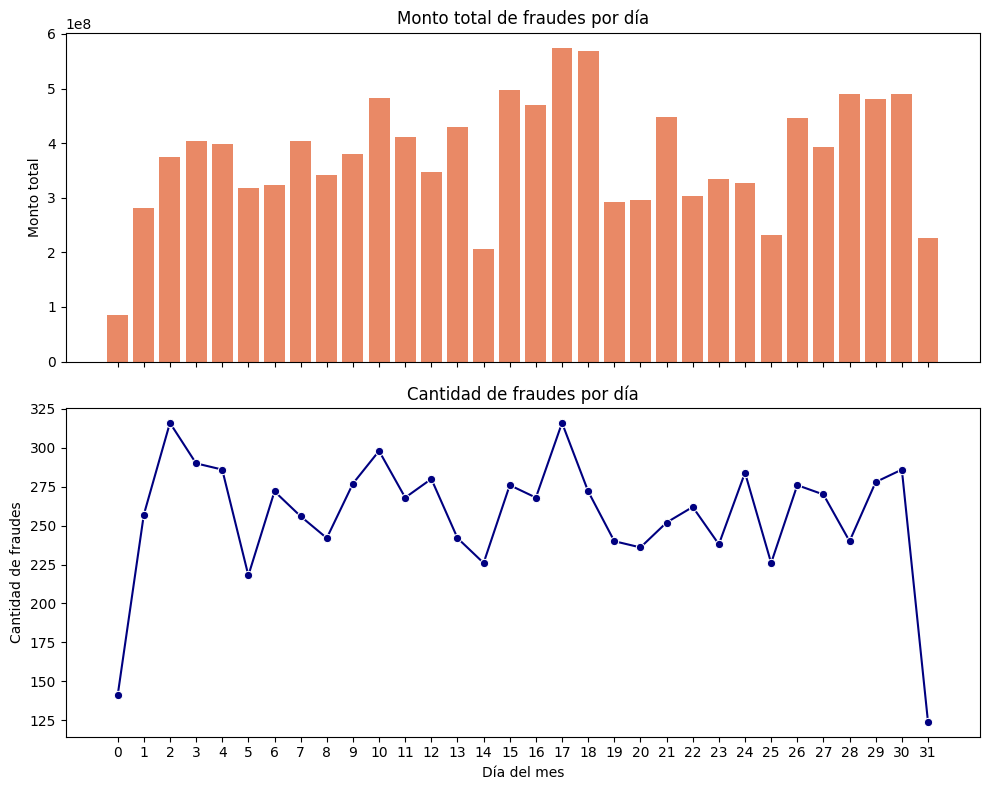

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Monto total por día
sns.barplot(ax=axes[0], x='dia', y='monto_total', data=fraude_agrupado, color='coral')
axes[0].set_ylabel('Monto total')
axes[0].set_title('Monto total de fraudes por día')

# Cantidad de fraudes por día
sns.lineplot(ax=axes[1], x='dia', y='cantidad', data=fraude_agrupado, marker='o', color='navy')
axes[1].set_ylabel('Cantidad de fraudes')
axes[1].set_title('Cantidad de fraudes por día')
axes[1].set_xlabel('Día del mes')

plt.tight_layout()
plt.show()


### Verifico si hay algun rango horario que suceda más fraude

In [ ]:
# Como el dia tiene 24hs voy a crear una columna que tenga los mismos horarios pero de distintos dias
df_mod_col['hora'] = (df_mod_col['step'] % 24).astype(int)
df_mod_col.tail(15)

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,dia,hora
6362605,742,CASH_OUT,54652.46,C43545501,C830041824,1,0,31,22
6362606,742,TRANSFER,303846.74,C959102961,C114421319,1,0,31,22
6362607,742,CASH_OUT,303846.74,C1148860488,C846260566,1,0,31,22
6362608,742,TRANSFER,258355.42,C1226129332,C1744173808,1,0,31,22
6362609,742,CASH_OUT,258355.42,C1113162093,C797688696,1,0,31,22
6362610,742,TRANSFER,63416.99,C778071008,C1812552860,1,0,31,22
6362611,742,CASH_OUT,63416.99,C994950684,C1662241365,1,0,31,22
6362612,743,TRANSFER,1258818.82,C1531301470,C1470998563,1,0,31,23
6362613,743,CASH_OUT,1258818.82,C1436118706,C1240760502,1,0,31,23
6362614,743,TRANSFER,339682.13,C2013999242,C1850423904,1,0,31,23


In [ ]:
# Filtramos solo los fraudes
df_only_fraude = df_mod_col[df_mod_col['isFraud'] == 1]
# Agrupamos por hora
fraude_por_hora = (
    df_only_fraude.groupby('hora')
    .agg(cantidad_fraudes=('amount', 'count'), monto_total=('amount', 'sum'))
    .reset_index()
)


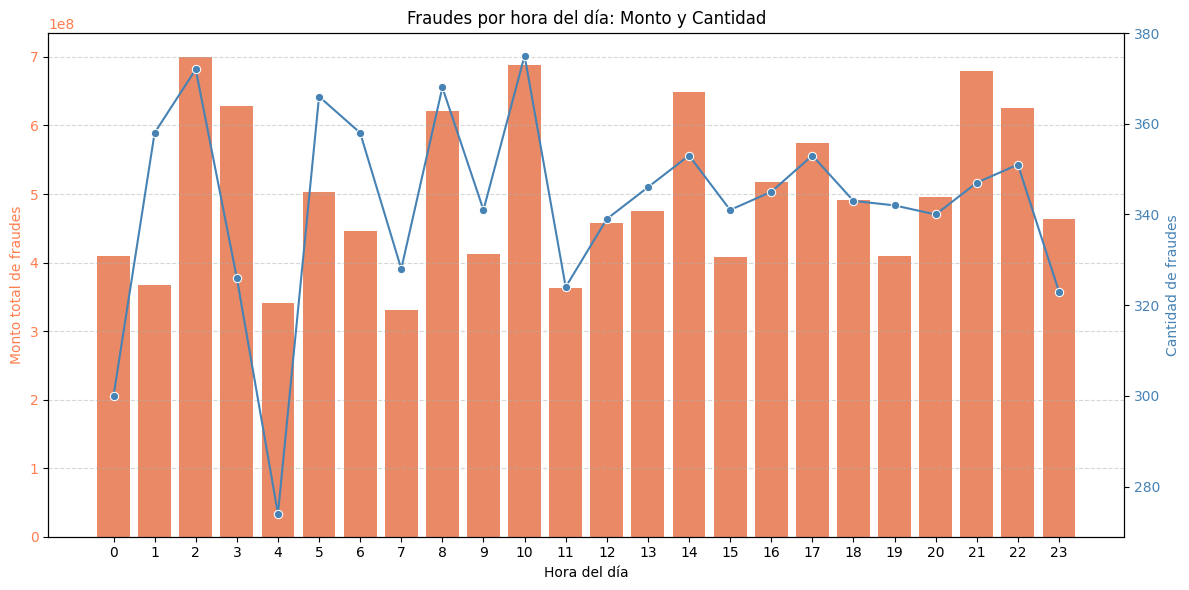

In [ ]:
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x='hora', y='monto_total', data=fraude_por_hora, color='coral')

# Eje secundario para cantidad de fraudes
ax2 = ax1.twinx()
sns.lineplot(x='hora', y='cantidad_fraudes', data=fraude_por_hora, marker='o', color='steelblue', ax=ax2)

# Etiquetas
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Monto total de fraudes', color='coral')
ax2.set_ylabel('Cantidad de fraudes', color='steelblue')
plt.title('Fraudes por hora del día: Monto y Cantidad')

# Mejoras estéticas
ax1.tick_params(axis='y', labelcolor='coral')
ax2.tick_params(axis='y', labelcolor='steelblue')
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Los fraudes ocurren todo el día aunque las horas más criticas por monto son:
- 2
- 3
- 8
- 10
- 14
- 21
- 22

### La cantidad varia entre:
- 0 a 2
- 5 a 10
- 13 a 22

----------------
### Con esta informacion vamos a visualizar como se distribuyen los fraudes en dia y horario

In [ ]:
# Heatmap de monto total de fraudes por día y hora
pivot_monto = df_only_fraude.pivot_table(
    index='dia',
    columns='hora',
    values='amount',
    aggfunc='sum',
    fill_value=0
)

# Hacemos uno por cantidad:
pivot_cantidad = df_only_fraude.pivot_table(
    index='dia',
    columns='hora',
    values='isFraud',
    aggfunc='count',
    fill_value=0
)

### Monto total de fraudes por Día y Hora

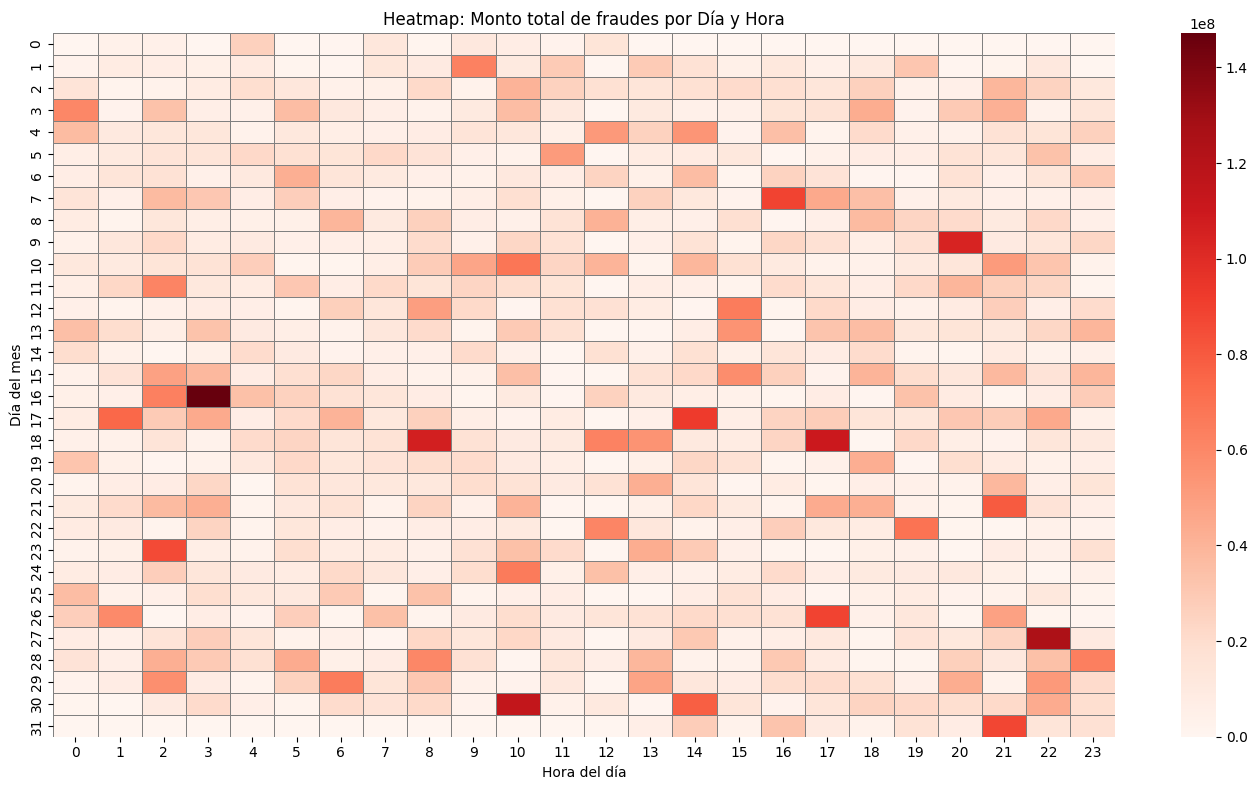

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_monto, cmap="Reds", linewidths=0.5, linecolor='gray')
plt.title("Monto total de fraudes por Día y Hora")
plt.xlabel("Hora del día")
plt.ylabel("Día del mes")
plt.tight_layout()
plt.show()

### Cantidad de fraudes por Día y Hora

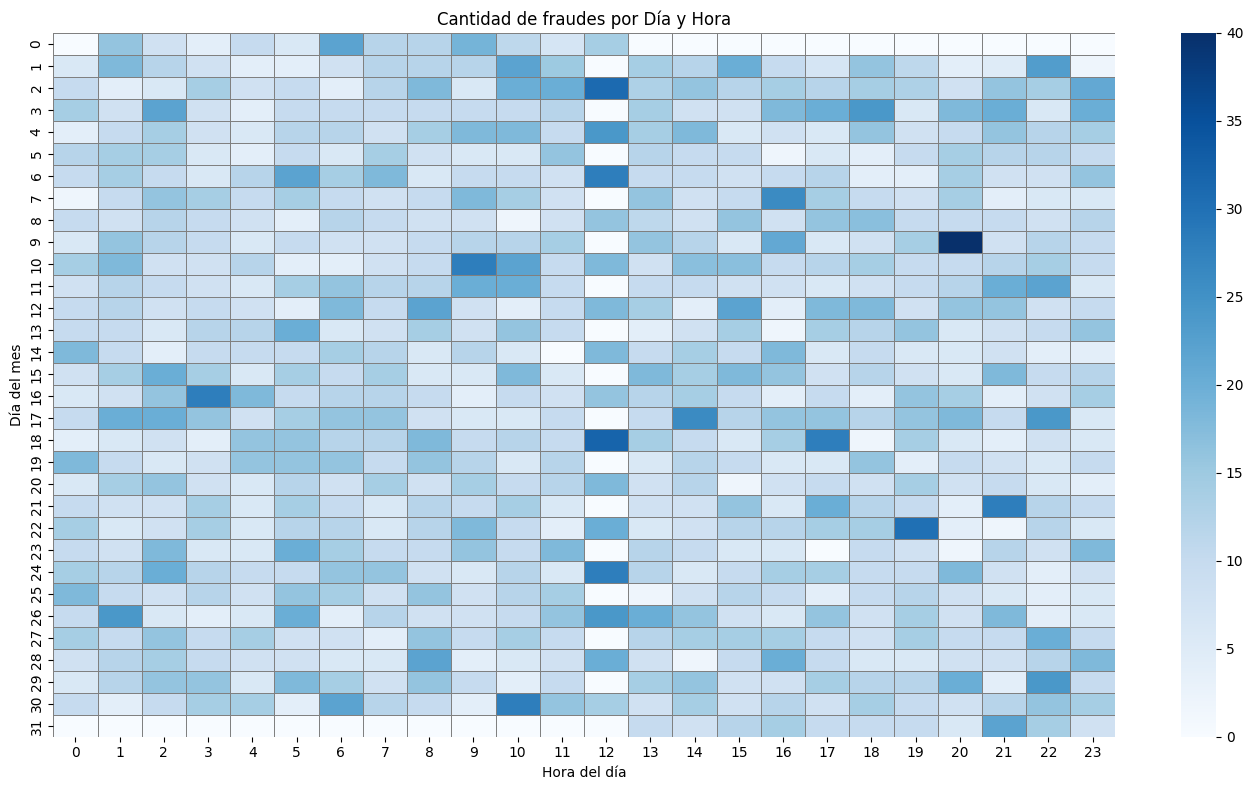

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_cantidad, cmap="Blues", linewidths=0.5, linecolor='gray')
plt.title("Cantidad de fraudes por Día y Hora")
plt.xlabel("Hora del día")
plt.ylabel("Día del mes")
plt.tight_layout()
plt.show()

# Vamos a analizar los usuarios más comprometidos en los fraudes

In [ ]:
# Top 10 de usuarios origen en fraudes
print('Top 10 de usuarios origen en fraudes: \n',df_mod_col[df_mod_col['isFraud'] == 1]['nameOrig'].value_counts().head(10))

# Top 10 de destinos en fraudes
print('\n\nTop 10 de destinos en fraudes: \n',df_mod_col[df_mod_col['isFraud'] == 1]['nameDest'].value_counts().head(10))


Top 10 de usuarios origen en fraudes: 
 nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64


Top 10 de destinos en fraudes: 
 nameDest
C1981613973    2
C410033330     2
C1366192319    2
C1655359478    2
C803116137     2
C52390890      2
C1325541393    2
C904300960     2
C2020337583    2
C475338087     2
Name: count, dtype: int64


In [ ]:
df_mod_col[(df_mod_col['isFraud'] == 1) and (df_mod_col['nameDest'].value_counts() == 2)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Relacion entre el (amount) monto  de dinero de tranferencia y fraude

In [207]:
#Obtengo solo los casos de fraude en el DataFrame
df_fra=df[df['isFraud']==1]

#Ordeno los Datos Por Monto , este caso uso la varible amount
fraud_monto = df_fra.sort_values(by=['amount'], ascending=False)


#Creo un histograma que muestre la distribucion de los montos por los casos de fraude

fraud_monto['amount'].plot(kind='hist', figsize=(10,5), edgecolor='black')
plt.xlabel('Montos de Transaccion  ')
plt.ylabel('Frecuencia')
plt.title('Monto de  Dinero de Transacciones y fraude')
plt.gcf().axes[0].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

KeyError: 'isFraud'

Del histograma anterior, podemos deducir que la mayoría de las transacciones fraudulentas se encuentran en el rango de 0 a 1 000 000, con aproximadamente ---   casos, seguido de los rangos de 1 000 000 a 2 000 000 y de 2 000 000 a 3 000 000, con aproximadamente 10 casos cada uno, y luego la cifra disminuye a partir de rangos superiores. Sin embargo, sorprendentemente, ¡hay casos de fraude que alcanzan los ---  millones! Lamentablemente, el editor no divulgó información sobre el tipo o el valor de la moneda en este conjunto de datos

In [200]:
df_fraud_original = df[df['isFraud']==1]

# Vverificar si las columnas existen en df_fraud_original antes de usarlas
if 'oldbalanceDest' in df_fraud_original.columns and 'newbalanceDest' in df_fraud_original.columns:

    fraud_by_RecipientBalanceBefore = df_fraud_original.sort_values(by=['oldbalanceDest'], ascending=False)
    fraud_by_RecipientBalanceBefore = fraud_by_RecipientBalanceBefore['oldbalanceDest']

    #Sort data by recipient's balance after transaction
    fraud_by_RecipientBalancAfter = df_fraud_original.sort_values(by=['newbalanceDest'], ascending=False)
    fraud_by_RecipientBalanceAfter = fraud_by_RecipientBalancAfter['newbalanceDest']

    #Create histogram for recipient's balance before vs. after transaction
    fig,ax = plt.subplots(1,2, figsize=(12,6), sharex=True)
    ax[0].hist(fraud_by_RecipientBalanceBefore, color='orange', edgecolor='black')
    ax[1].hist(fraud_by_RecipientBalanceAfter, color='orange', edgecolor='black')
    fig.suptitle('Recipient\'s balance before vs. after fraud transaction', fontsize=16)
    ax[0].set_title('Balance before fraudulent transaction')
    ax[1].set_title('Balance after fraudulent transaction')
    # Asegurarse de que mpl esté importado
    import matplotlib as mpl
    plt.gcf().axes[0].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.gcf().axes[1].xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.tight_layout()
    plt.show() # Agregar plt.show() para mostrar la gráfica

else:
    print("Las columnas 'oldbalanceDest' o 'newbalanceDest' no están presentes en el DataFrame.")


KeyError: 'isFraud'

*****************************************************

In [ ]:
type(cuentaDestinos) # como es una serie la convierto en Dataframe
df_resultado = cuentaDestinos.reset_index()
df_resultado.columns = ['nameDest', 'count']
print(df_resultado)

Empty DataFrame
Columns: [nameDest, count]
Index: []


Empty DataFrame
Columns: [count, nameDest]
Index: []


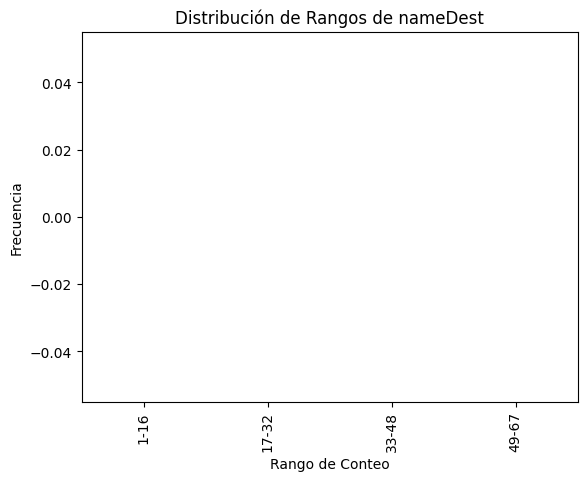

In [ ]:

bins = [0, 16, 32, 48, 67]
# Define las etiquetas para tus bins
labels = ['1-16', '17-32', '33-48', '49-67']

df_resultado['nameDest'] = pd.cut(df_resultado['count'], bins=bins, labels=labels, right=True, include_lowest=True)

print(df_resultado[['count', 'nameDest']])

# Ahora puedes graficar la distribución de 'nameDest'
import matplotlib.pyplot as plt
df_resultado['nameDest'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Rangos de nameDest')
plt.xlabel('Rango de Conteo')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
#categories =
bins = [0, 4, 8, 12, 16, 32, 48, 67]
# Define las etiquetas para tus bins
labels = ['1-4','5-8','9-12','13-16', '17-32', '33-48', '49-67']

df_resultado['nameDest'] = pd.cut(df_resultado['count'], bins=bins, labels=labels, right=True, include_lowest=True)

print(df_resultado[['count', 'nameDest']])

# Ahora puedes graficar la distribución de 'nameDest'
import matplotlib.pyplot as plt
df_resultado['nameDest'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Rangos de nameDest')
plt.xlabel('Rango de Conteo')
plt.ylabel('Frecuencia')
plt.show()

NameError: name 'df_resultado' is not defined

In [ ]:
nre = df[(df['isFlaggedFraud'] == 1)]
print(nre)


Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


In [ ]:
mostra = df.query("isFlaggedFraud == 1 ")
mostra

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
df['']

In [ ]:
df_with_flag['isFlaggedFraud'].unique() # no pone como condicion los montos mayores a 200.000  como advertencia de que hay fraude


array([0, 1])

In [ ]:

fraudes = df[['nameOrig', 'oldbalanceOrg', 'newbalanceDest','isFraud']]
fraudes.head(10)
#df.groupby('nameOrig')[('oldbalanceOrg')('newbalanceDest')]



,nameOrig,oldbalanceOrg,newbalanceDest,isFraud
0,C1231006815,170136.00,0.00,0.0
1,C1666544295,21249.00,0.00,0.0
2,C1305486145,181.00,0.00,1.0
3,C840083671,181.00,0.00,1.0
4,C2048537720,41554.00,0.00,0.0
5,C90045638,53860.00,0.00,0.0
6,C154988899,183195.00,0.00,0.0
7,C1912850431,176087.23,0.00,0.0
8,C1265012928,2671.00,0.00,0.0
9,C712410124,41720.00,40348.79,0.0


In [ ]:
print(df[df['nameDest'] == 'C1286084959	']['amount'].sum().round(2)) # total de la cuenta C553264065

0.0


In [ ]:
soloYPF = df.query("nameOrig == 'C1305486145' ")
soloYPF

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1.0,0.0


In [ ]:
# buscamos la Media
media=df.median(numeric_only=True)
media

NameError: name 'df' is not defined

In [ ]:
df['nameDest'].value_counts()

,count
nameDest,
C985934102,84
C1286084959,83
C248609774,78
C2083562754,77
C1590550415,75
...,...
M715180935,1
M1271942132,1
M1292277345,1


In [ ]:
df.dtype()

,0
type,object
amount,float64
porcentaje,float64


In [ ]:
df= pd.DataFrame(df,
                   columns = [ 'type', 'amount', 'porcentaje'])

df['porcentaje'] = (df['amount'] /
                  df['amount'].sum()) * 100
print(df)
# calculamos la columna porcentaje, la cual se añade automaticmente # al dataframe accesorios. Dividimos la cantidad entre la suma de
# la columna y la multiplicamos por 100


            type    amount    porcentaje
0        PAYMENT   9839.64  2.220622e-05
1        PAYMENT   1864.28  4.207331e-06
2       TRANSFER    181.00  4.084831e-07
3       CASH_OUT    181.00  4.084831e-07
4        PAYMENT  11668.14  2.633281e-05
...          ...       ...           ...
246943   PAYMENT   4006.96  9.042958e-06
246944   PAYMENT  12343.00  2.785584e-05
246945   PAYMENT  12838.82  2.897481e-05
246946   PAYMENT   1322.31  2.984206e-06
246947   PAYMENT  13301.27  3.001847e-05

[246948 rows x 3 columns]


,0
type,object
amount,float64
porcentaje,float64


In [ ]:
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,1
isFraud,1


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,490697.000000,4.906970e+05,4.906970e+05,4.906970e+05,4.906970e+05,4.906960e+05,490696.000000,490696.0
mean,13.794847,1.670025e+05,9.108310e+05,9.305278e+05,9.824424e+05,1.163724e+06,0.000471,0.0
std,3.676322,2.736069e+05,3.009629e+06,3.046769e+06,2.336777e+06,2.512668e+06,0.021692,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,11.000000,1.340038e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,14.000000,8.165704e+04,1.869117e+04,0.000000e+00,1.181926e+05,2.221823e+05,0.000000,0.0
75%,17.000000,2.235817e+05,1.716460e+05,2.113850e+05,8.952688e+05,1.202339e+06,0.000000,0.0
max,19.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.148270e+07,1.000000,0.0


In [ ]:
datos_faltantes = df.isnull().sum()
print(datos_faltantes)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


In [ ]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
490687,19,CASH_IN,44352.37,C676558526,20943.00,65295.37,C2102040020,15224565.59,15303188.38,0.0,0.0
490688,19,CASH_OUT,272964.87,C743844257,16.00,0.00,C915049328,2396618.54,2611820.67,0.0,0.0
490689,19,PAYMENT,4955.89,C159387996,18968.00,14012.11,M924861045,0.00,0.00,0.0,0.0
490690,19,PAYMENT,10134.14,C74785961,14012.11,3877.96,M426970791,0.00,0.00,0.0,0.0
490691,19,PAYMENT,11381.45,C275834404,160948.00,149566.55,M628501941,0.00,0.00,0.0,0.0
490692,19,CASH_IN,274669.00,C134940126,39016.00,313685.00,C237685833,167627.31,0.00,0.0,0.0
490693,19,CASH_OUT,114040.95,C151790670,282534.35,168493.40,C1991825762,349639.26,522567.44,0.0,0.0
490694,19,CASH_OUT,240854.07,C509260429,168493.40,0.00,C314882858,3026796.40,3486361.48,0.0,0.0
490695,19,CASH_IN,220100.51,C173358966,13036.79,233137.31,C1994989877,248806.95,28706.44,0.0,0.0
490696,19,CASH_IN,67136.31,C1520500247,233137.31,300273.62,C804372771,47.00,NaN,NaN,NaN


In [ ]:
resultado=df.isnull().sum().max()
print(f"El valor máximo de datos faltantes es {resultado}")

El valor máximo de datos faltantes es 1


In [ ]:
resultado=df.isnull()
print(f" {resultado}")

          step   type  amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0       False  False   False     False          False           False   
1       False  False   False     False          False           False   
2       False  False   False     False          False           False   
3       False  False   False     False          False           False   
4       False  False   False     False          False           False   
...       ...    ...     ...       ...            ...             ...   
490692  False  False   False     False          False           False   
490693  False  False   False     False          False           False   
490694  False  False   False     False          False           False   
490695  False  False   False     False          False           False   
490696  False  False   False     False          False           False   

        nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0          False           False           Fal

In [ ]:
resultado=df.isnull().all()
print(f" {resultado}")


 step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool


step              0.000000
type              0.000000
amount            0.000000
nameOrig          0.000000
oldbalanceOrg     0.000000
newbalanceOrig    0.000000
nameDest          0.000000
oldbalanceDest    0.000000
newbalanceDest    0.000204
isFraud           0.000204
isFlaggedFraud    0.000204
dtype: float64


In [ ]:
fraudes = df[['type', 'amount', 'isFraud']]
print(fraudes)

            type     amount  isFraud
0        PAYMENT    9839.64      0.0
1        PAYMENT    1864.28      0.0
2       TRANSFER     181.00      1.0
3       CASH_OUT     181.00      1.0
4        PAYMENT   11668.14      0.0
...          ...        ...      ...
490692   CASH_IN  274669.00      0.0
490693  CASH_OUT  114040.95      0.0
490694  CASH_OUT  240854.07      0.0
490695   CASH_IN  220100.51      0.0
490696   CASH_IN   67136.31      NaN

[490697 rows x 3 columns]


In [ ]:
#promedio de tipo de fraude
df.groupby('type')['amount'].mean().round(2)

,amount
type,
CASH_IN,174261.59
CASH_OUT,188294.58
DEBIT,6523.71
PAYMENT,11667.34
TRANSFER,692408.62


In [ ]:
# suma total  de los tipos de transacciones
df.groupby('type')['amount'].sum().round(2)







,amount
type,
CASH_IN,2.363674e+11
CASH_OUT,3.944130e+11
DEBIT,2.271992e+08
PAYMENT,2.809337e+10
TRANSFER,4.852920e+11


In [ ]:
# el mayor monto de tipo de transaciones
df.groupby('type')['amount'].count().round(2)

,amount
type,
CASH_IN,1399284
CASH_OUT,2237500
DEBIT,41432
PAYMENT,2151495
TRANSFER,532909


In [ ]:
fraudes_drop = df.dropna()  # borre los nulos
print(fraudes_drop)

         step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282

In [ ]:
 # cuantas columnas y  filas quedaron quedaron a borrar los nulos

fraudes_drop.shape

(6362620, 11)

In [ ]:
#how: {'any', 'all'}, Si hay un valor faltante elimina la columna o fila
#All: Si todos los valores de la fila o columna son faltantes, elimina la fila o columna.
fraudes.dropna(how='all')

,type,amount,isFraud
0,PAYMENT,9839.64,0
1,PAYMENT,1864.28,0
2,TRANSFER,181.00,1
3,CASH_OUT,181.00,1
4,PAYMENT,11668.14,0
...,...,...,...
6362615,CASH_OUT,339682.13,1
6362616,TRANSFER,6311409.28,1
6362617,CASH_OUT,6311409.28,1
6362618,TRANSFER,850002.52,1


In [ ]:
fraudes.dropna(subset=['isFraud'])

,type,amount,isFraud
0,PAYMENT,9839.64,0
1,PAYMENT,1864.28,0
2,TRANSFER,181.00,1
3,CASH_OUT,181.00,1
4,PAYMENT,11668.14,0
...,...,...,...
6362615,CASH_OUT,339682.13,1
6362616,TRANSFER,6311409.28,1
6362617,CASH_OUT,6311409.28,1
6362618,TRANSFER,850002.52,1


<ipython-input-44-3fca9cd8508b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=fraudes, palette="Set3")


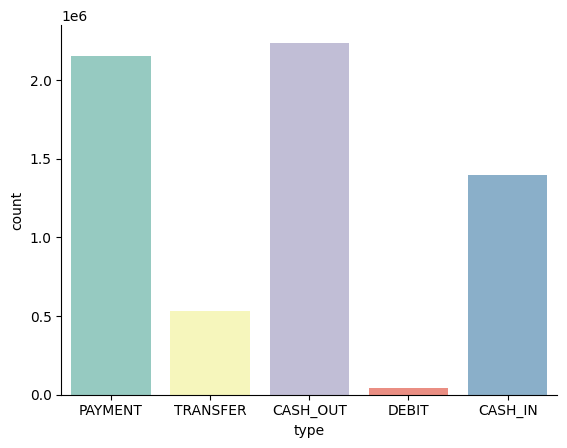

In [ ]:
sns.countplot(x="type", data=fraudes, palette="Set3")
sns.despine()

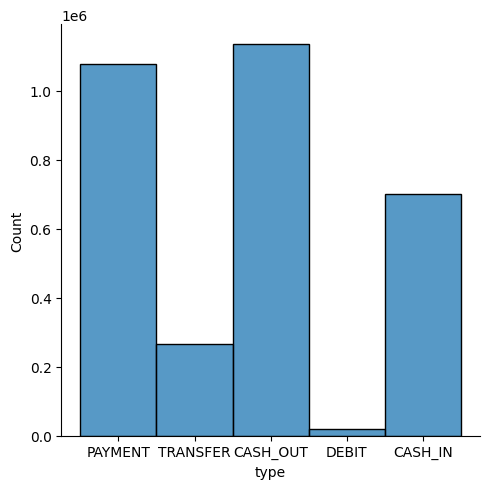

In [ ]:
sns.displot(fraudes['type'])
sns.despine()

In [ ]:
fraudes.dtypes

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,float64


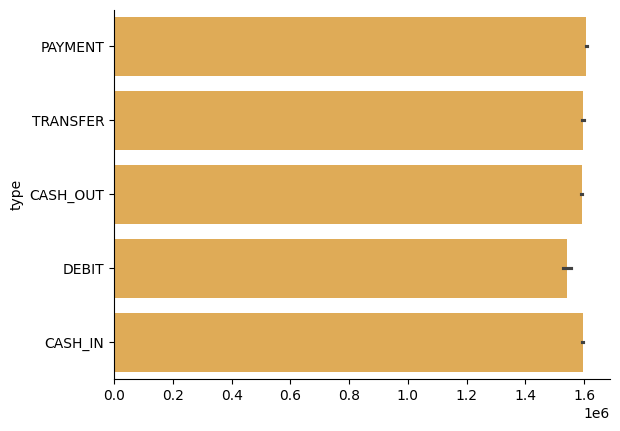

In [ ]:
sns.barplot(fraudes['type'], color='#F5B041')
sns.despine()

In [ ]:
fraudes['type'].value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


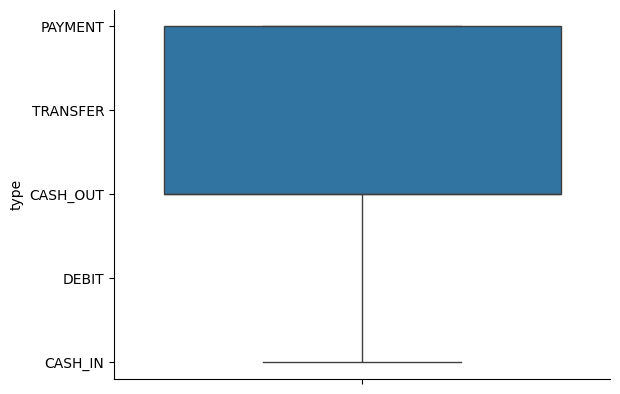

In [ ]:
sns.boxplot(fraudes['type'])
sns.despine()

<ipython-input-54-61fac90bf147>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best', frameon=False)


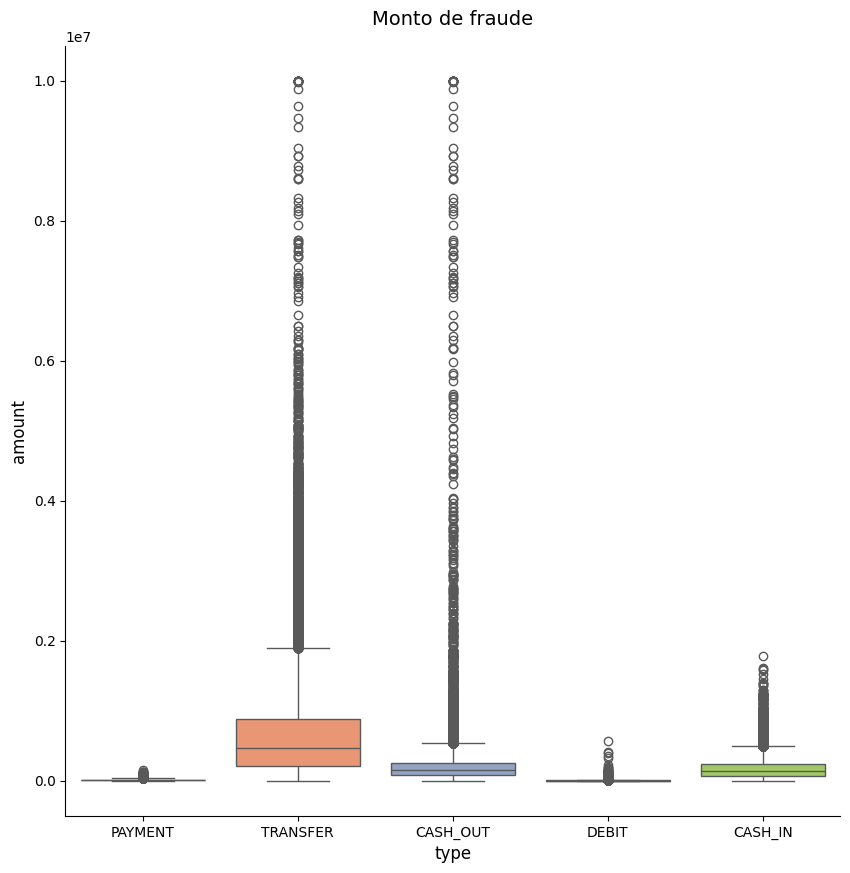

In [ ]:
plt.figure(figsize=(10, 10))
# Assuming you want to plot the 'amount' on the y-axis and group by 'type'
sns.boxplot(x="type", y="amount", data=fraudes, palette="Set2", hue='type')

plt.title('Monto de fraude', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('type', size=12)
plt.ylabel('amount', size=12)
sns.despine()
plt.show()
